## Heatmaps and FacetGrid

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
diamonds = pd.read_csv("../Data/Diamonds Prices2022.csv").drop(["Unnamed: 0"], axis=1)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds_pivot = diamonds.pivot_table(index="clarity",
                                    columns="color",
                                    values="price",
                                    aggfunc="mean"
)

diamonds_pivot.head()

color,D,E,F,G,H,I,J
clarity,,,,,,,
I1,3863.023810,3488.421569,3342.181818,3545.693333,4453.413580,4302.184783,5254.060000
IF,8307.369863,3668.506329,2750.836364,2558.033774,2287.869565,1994.937063,3363.882353
SI1,2976.146423,3161.670787,3713.776266,3774.787449,5032.414945,5355.019663,5186.048000
SI2,3931.101460,4173.826036,4472.625233,5021.684109,6099.895074,7002.649123,6520.958246
VS1,3030.158865,2856.294301,3796.717742,4131.362197,3780.688623,4633.183992,4884.461255


<Axes: xlabel='color', ylabel='clarity'>

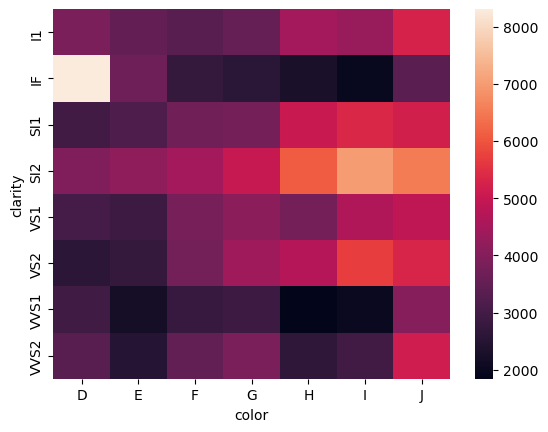

In [4]:
sns.heatmap(diamonds_pivot)

<Axes: xlabel='color', ylabel='clarity'>

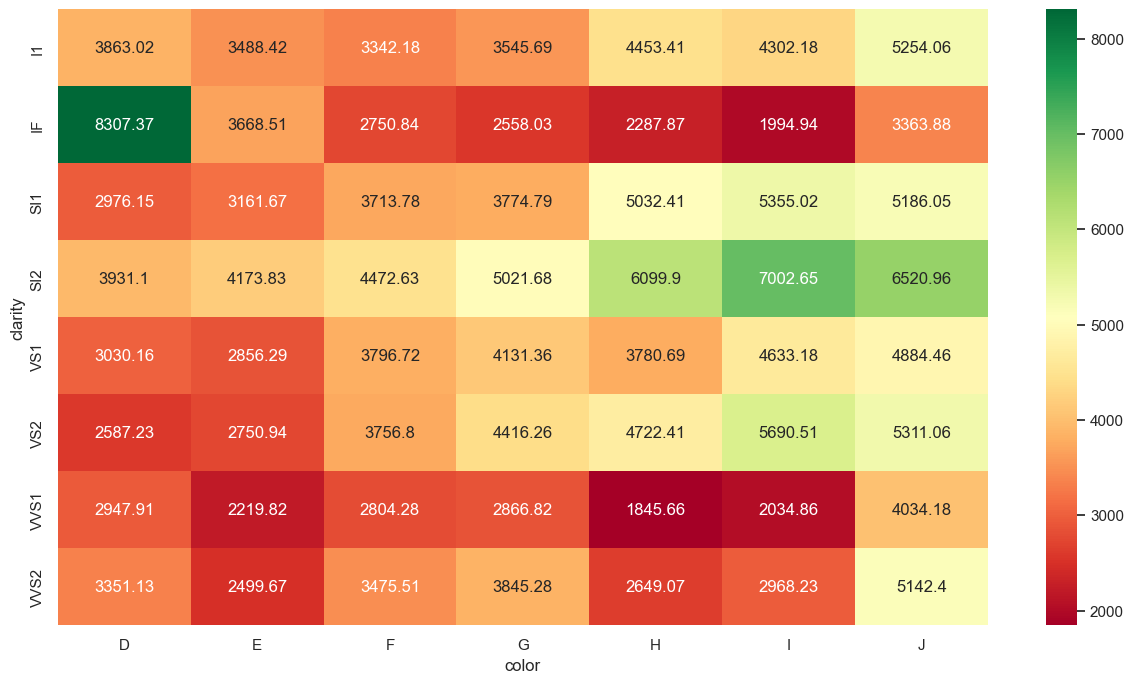

In [10]:
#set fig size (easier to read...)
sns.set(rc={'figure.figsize':(15,8)})

sns.heatmap(diamonds_pivot,
           annot=True, #adds values to squares
           fmt="g", #takes it out of scientific notation
           cmap="RdYlGn" #gives color choice
)

In [12]:
diamonds_pivot2 = diamonds.pivot_table(index="cut",
                                    columns="color",
                                    values={"carat":"mean"} # compare to other pivot
)

diamonds_pivot2.head()

carat                                                    \
color             D         E         F         G         H         I   
cut                                                                     
Fair       0.920123  0.856607  0.904712  1.023822  1.219175  1.198057   
Good       0.744517  0.745134  0.775930  0.850896  0.914729  1.057222   
Ideal      0.565766  0.578401  0.655829  0.700715  0.799525  0.913029   
Premium    0.721547  0.717742  0.826985  0.841488  1.016449  1.144937   
Very Good  0.696424  0.676327  0.740961  0.766799  0.915948  1.046952   

                     
color             J  
cut                  
Fair       1.341176  
Good       1.099544  
Ideal      1.063594  
Premium    1.293094  
Very Good  1.133215

<Axes: xlabel='color', ylabel='cut'>

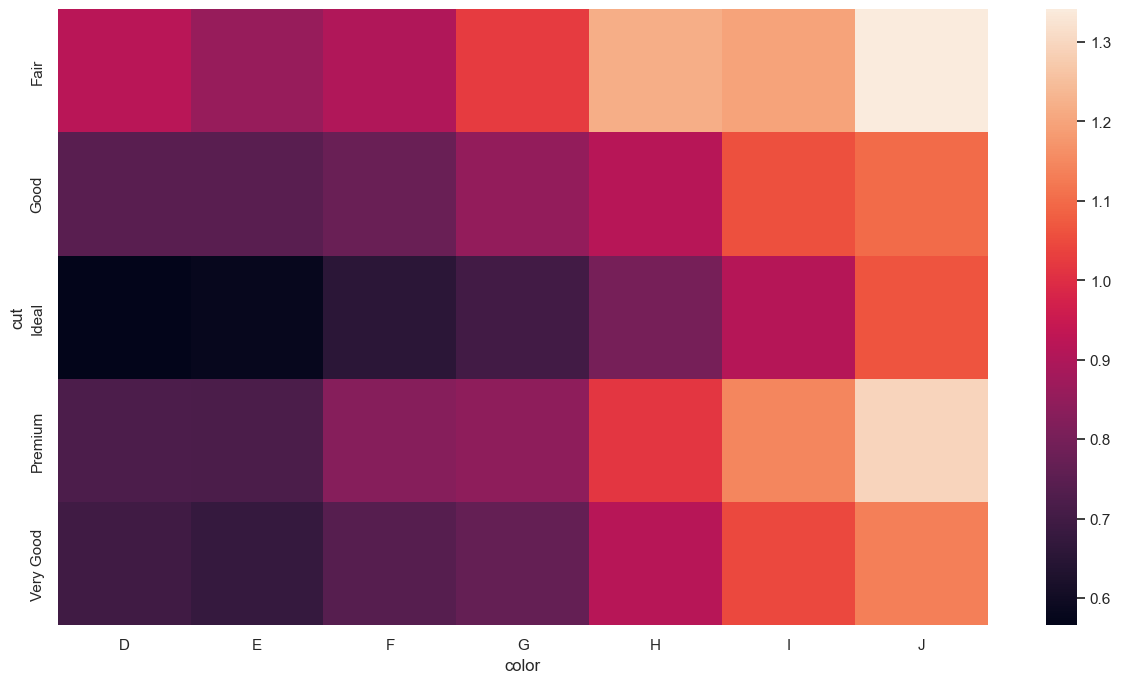

In [15]:
# droplevel cleans up the labels
sns.heatmap(diamonds_pivot2.droplevel(0, axis=1)
           )

In [17]:
# .corr() creates a correlation matrix
diamonds.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028234,0.181602,0.921591,0.975093,0.951721,0.953387
depth,0.028234,1.000000,-0.295798,-0.010630,-0.025289,-0.029340,0.094927
table,0.181602,-0.295798,1.000000,0.127118,0.195333,0.183750,0.150915
price,0.921591,-0.010630,0.127118,1.000000,0.884433,0.865419,0.861249
x,0.975093,-0.025289,0.195333,0.884433,1.000000,0.974701,0.970771
y,0.951721,-0.029340,0.183750,0.865419,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150915,0.861249,0.970771,0.952005,1.000000


<Axes: >

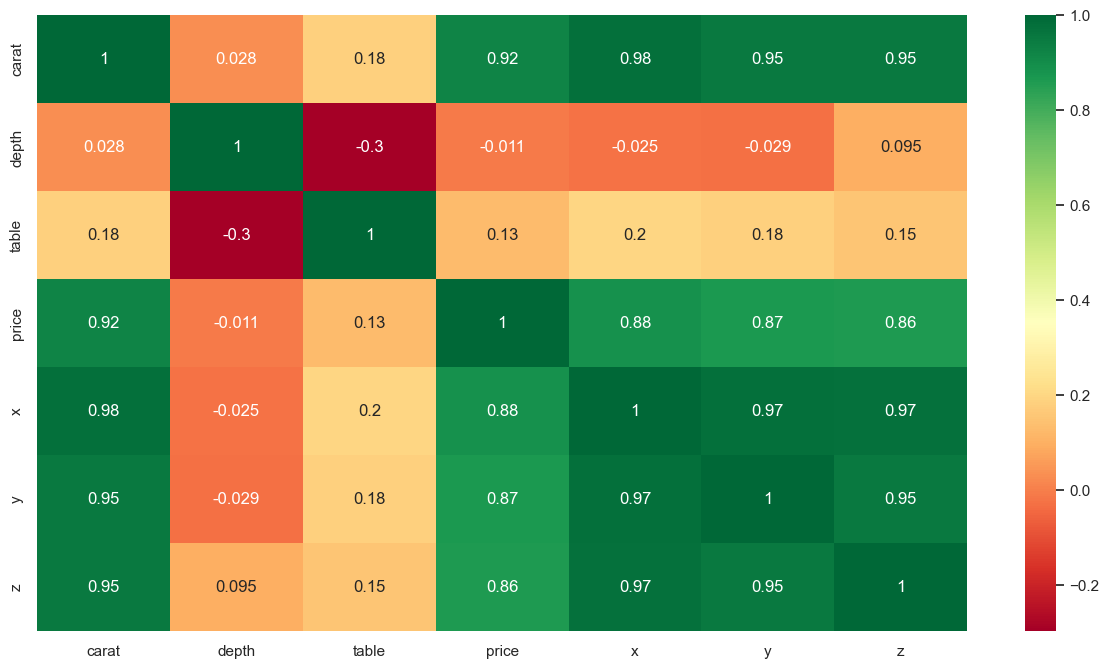

In [18]:
# use the correlation matrix to get a quick read on the dataframe
sns.heatmap(diamonds.corr(numeric_only=True),
           annot=True,
           cmap="RdYlGn"
)

### FacetGrid

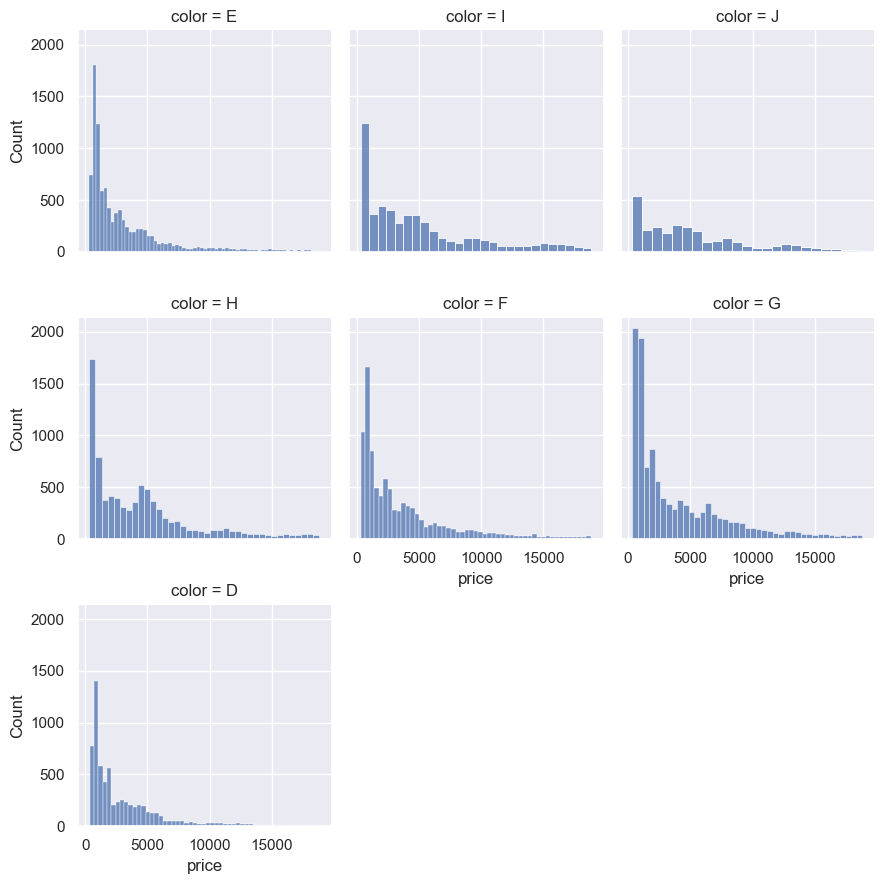

In [20]:
#creating the grid
g = sns.FacetGrid(diamonds,
                 col="color",
                 col_wrap=3)

# placing charts on grid
g.map_dataframe(sns.histplot, x="price")